In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv(r"C:\Users\Avnish\OneDrive\Documents\heart.txt")

In [29]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [30]:
df.shape

(303, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
(df.isnull().sum()/len(df))*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [34]:
df.duplicated().sum()

1

In [35]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [36]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


## **Applying EDA**

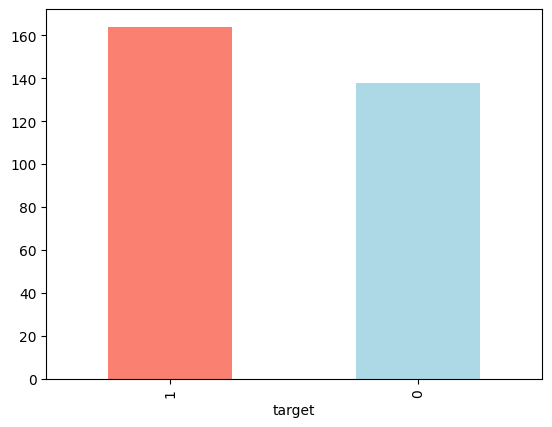

In [38]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

## We have 165 people with heart disease and 138 people without heart disease

<Axes: >

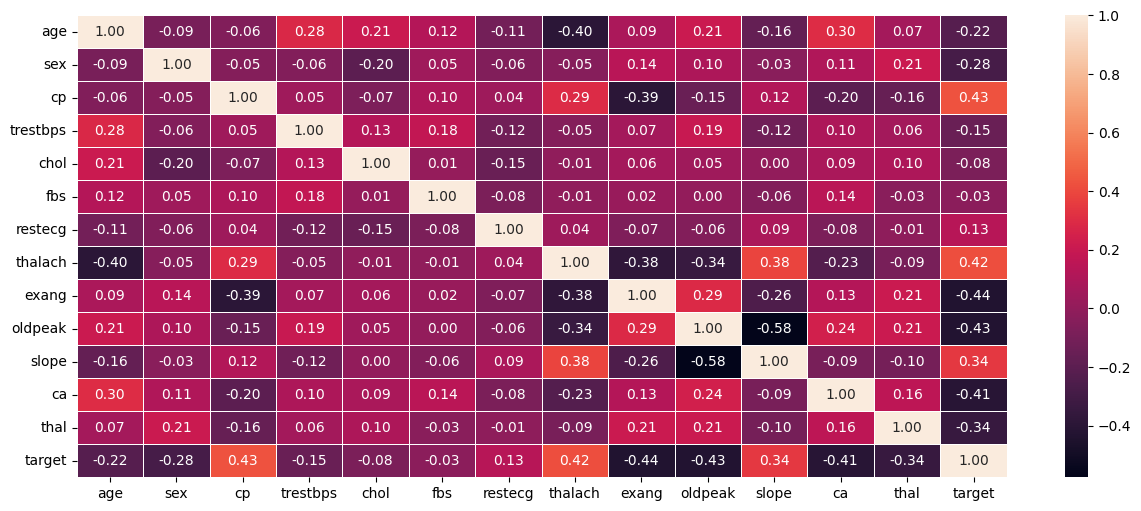

In [39]:
corr_matrix = df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f")

<Axes: xlabel='cp', ylabel='Count'>

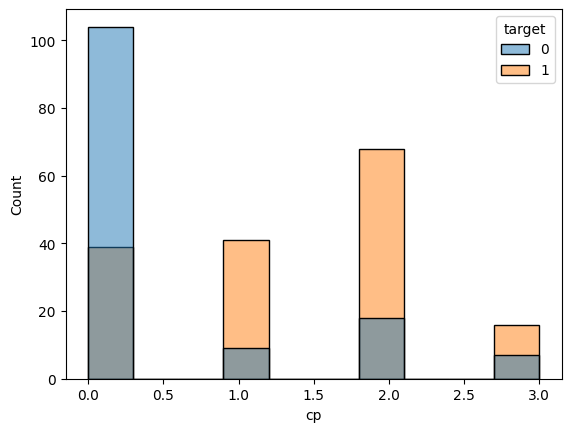

In [40]:
sns.histplot(x=df['cp'], hue=df['target'])

### People with **CP -  [ 1,2,3]**  Have More Chances of Heart disease
### People with **CP - 0** have very less chances of Heart Disease

<Axes: xlabel='thalach', ylabel='Count'>

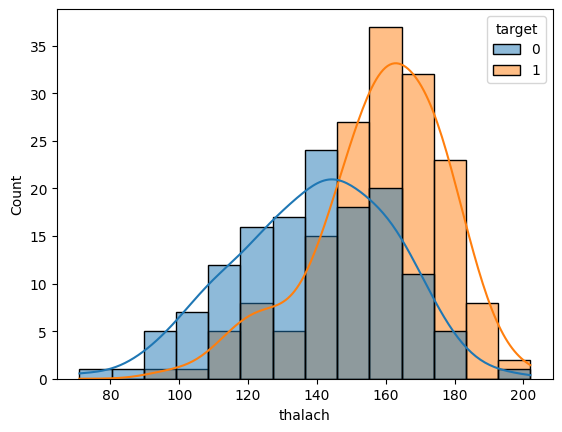

In [41]:
sns.histplot(x=df['thalach'], hue=df['target'], kde=True)

### People with **thalach** (Max. Heart Rate)  **above 140** are more likely to have Heart Disease

<Axes: xlabel='slope', ylabel='count'>

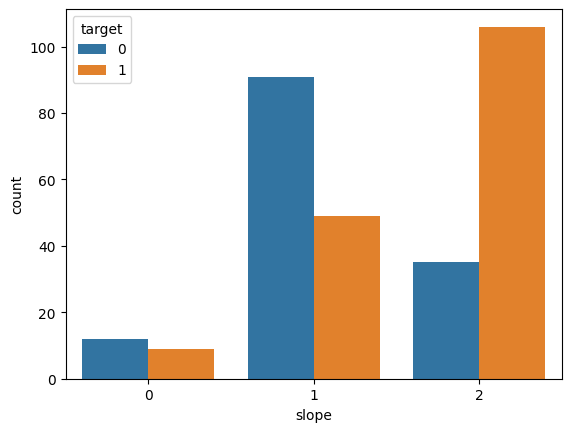

In [42]:
sns.countplot(x=df['slope'] , hue= df['target'])

### People with **SLOPE 2** are more likely to have Heart Disease than **0, 1**

### 

<Axes: xlabel='restecg', ylabel='count'>

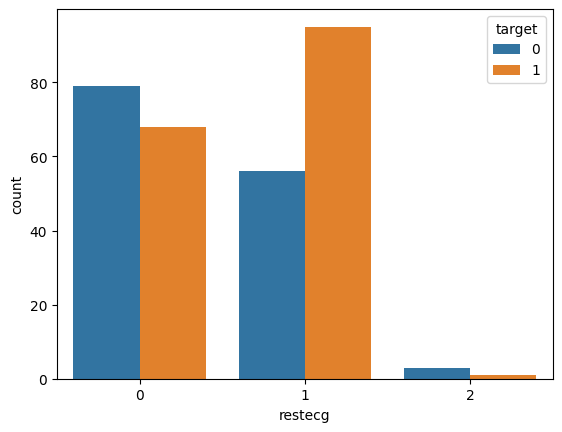

In [43]:
sns.countplot(x=df['restecg'] , hue= df['target'])

### People with a value of **RESTECG** **1** are more likely to have heart disease.

<Axes: xlabel='exang', ylabel='count'>

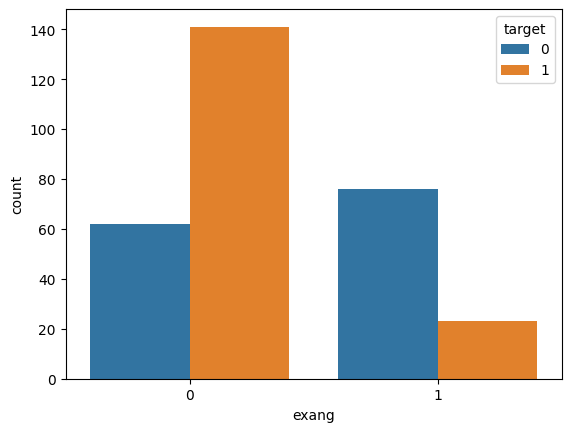

In [44]:
sns.countplot(x=df['exang'] , hue= df['target'])

### People with a value of **0** **EXANG** have more heart disease than people with a value of **1**  [ exercise induced angina]

<Axes: xlabel='oldpeak', ylabel='Count'>

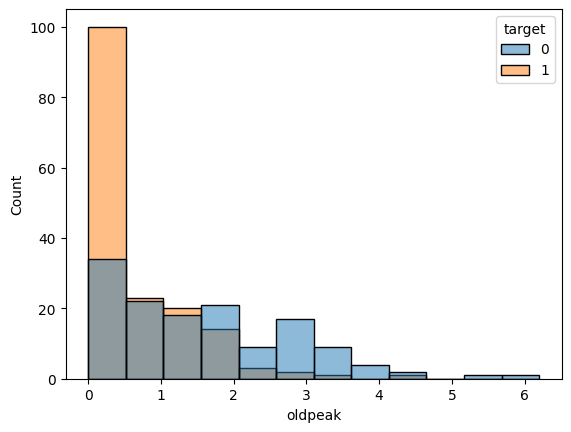

In [45]:
# df['oldpeak'].plot(kind='hist')
sns.histplot(data=df, x='oldpeak', hue='target', fill=True, bins=12 )

### People with **0 oldpeak** have very much chances of Heart Disease

# **ANLYSIS RESULT**

### ***CP(Chest Pain) ->***   People with **CP -  [ 1,2,3]**  Have More Chances of Heart disease than people with **CP - 0**
### ***THALACH ->*** People with **thalach** (Max. Heart Rate)  **above 140** are more likely to have Heart Disease
### ***SLOPE ->*** People with **SLOPE 2** are more likely to have Heart Disease than **0, 1**
### ***RESTECG ->*** People with a value of **RESTECG** **1** are more likely to have heart disease.
### ***EXANG ->*** People with a value of **0** **EXANG** have more heart disease than people with a value of **1**  [ exercise induced angina]
### ***OLDPEAK ->*** People with **0 oldpeak** have very much chances of Heart Disease
## 
##
# .

# **Applying** **Logistic Regression**

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns] = scaler.fit_transform(df[columns])

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 83.60655737704919


In [49]:
test_score = accuracy_score(y_test, clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, clf.predict(X_train)) * 100

In [50]:
results_df = pd.DataFrame(data=[[ train_score, test_score]], 
                          columns=[ 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Training Accuracy %,Testing Accuracy %
0,86.721992,83.606557
